# Regression Models as a Binary Classifier

The regression models can be utilized as classifier or decision boundary between two classes 0 and 1 using arrangement similar to a Heaviside step function below:

$\displaystyle h_w(x) = \left\{ \begin{array}{c} 1 & h_w(x) \geq \alpha \\ 0 & \text{otherwise}\end{array} \right.$

where $\alpha$ is $0$ or mean of data points. However, with the approach, $h_w(x)$ does not make any distinction in distance (near/far) of values of $h(x)$. Thus the boundary of threshold between them is hard. This is problematic due to the number of weight updates during training phase. As an eample, consider the following linear regression case:

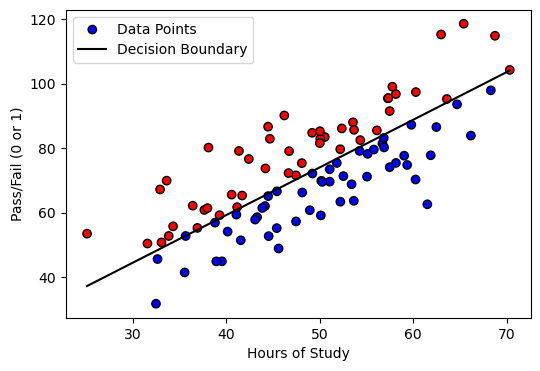

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Loading my data
points = np.genfromtxt('data.csv', delimiter=',')
x = points[:, 0]
y = points[:, 1]

# Configurations
learning_rate = 0.0001
b = 0
m = 0
num_iterations = 100

# Training Loop
for i in range(num_iterations):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    total_cost = 0
    
    for j in range(0, len(points)):
        x_j = points[j, 0]
        y_j = points[j, 1]
        h_x = (m * x_j + b)
        m_gradient += (2/N) * x_j * (y_j - h_x)
        b_gradient += (2/N) *       (y_j - h_x)
     
    m = m + learning_rate * m_gradient
    b = b + learning_rate * b_gradient

# Classify Points
predicted_y = m * x + b
labels = np.where(y >= predicted_y, 1, 0)  # 1 if above line, 0 if below

# Plot Data and Decision Boundary
plt.figure(figsize=(6,4))
plt.scatter(x, y, c=labels, cmap='bwr', edgecolors='k', label="Data Points")

decision_boundary_x = np.linspace(min(x), max(x), 100)
decision_boundary_y = m * decision_boundary_x + b
plt.plot(decision_boundary_x, decision_boundary_y, 'k-', label="Decision Boundary")

plt.xlabel('Hours of Study')
plt.ylabel('Pass/Fail (0 or 1)')
plt.legend()
plt.show()

# Activation Functions

Activation functions introduce non-linearity into neural networks, allowing them to model complex patterns.  

## Sigmoid
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$  

- Outputs values in the range (0,1)  
- Used for binary classification  
- **Derivative:**  
  $$ \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x)) $$

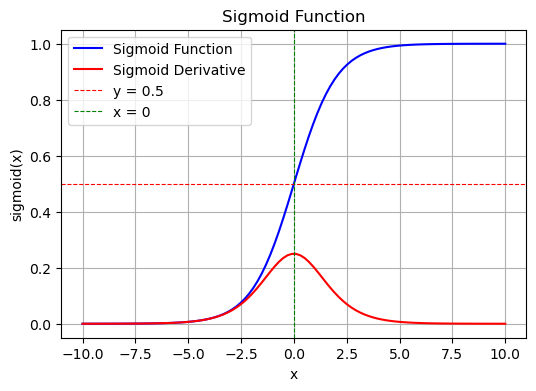

In [164]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)
    
# Generate values
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
dy = sigmoid_derivative(x)

# Plot the sigmoid function
plt.figure(figsize=(6, 4))
plt.plot(x, y, label="Sigmoid Function", color='b')
plt.plot(x, dy, label="Sigmoid Derivative", color='r')
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=0.8, label="y = 0.5")
plt.axvline(x=0, color='g', linestyle='--', linewidth=0.8, label="x = 0")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function")
plt.legend()
plt.grid()
plt.show()

## Tanh (Hyperbolic Tangent)
$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$  

- Outputs values in the range (-1,1)
- Used in hidden layers to normalize data around zero
- **Derivative:**  
  $$ \tanh'(x) = 1 - \tanh^2(x) $$

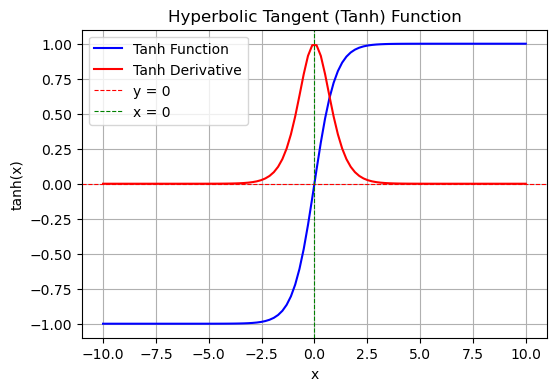

In [163]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

x = np.linspace(-10, 10, 100)
y = tanh(x)
dy = tanh_derivative(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="Tanh Function", color='b')
plt.plot(x, dy, label="Tanh Derivative", color='r')
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.8, label="y = 0")
plt.axvline(x=0, color='g', linestyle='--', linewidth=0.8, label="x = 0")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.title("Hyperbolic Tangent (Tanh) Function")
plt.legend()
plt.grid()
plt.show()

## ReLU (Rectified Linear Unit)  
$$ ReLU(x) = \max(0, x) $$  

- Outputs values in the range (0, infinity)
- Helps mitigate the vanishing gradient problem  
- **Derivative:**  
  $$
  ReLU'(x) =
  \begin{cases} 
  1 & x > 0 \\
  0 & x \leq 0
  \end{cases}
  $$

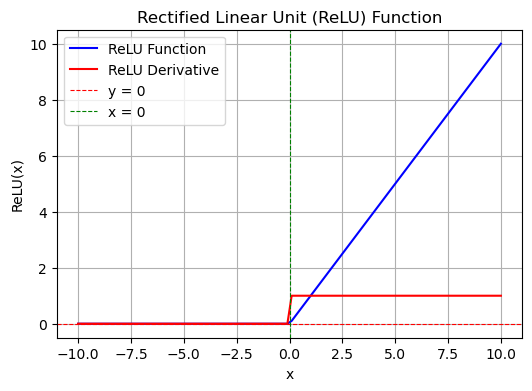

In [161]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 100)
y = relu(x)
dy = relu_derivative(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="ReLU Function", color='b')
plt.plot(x, dy, label="ReLU Derivative", color='r')

plt.axhline(y=0, color='r', linestyle='--', linewidth=0.8, label="y = 0")
plt.axvline(x=0, color='g', linestyle='--', linewidth=0.8, label="x = 0")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.title("Rectified Linear Unit (ReLU) Function")
plt.legend()
plt.grid()
plt.show()

## Softmax
$$ \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $$

- Converts raw scores (logits) into probabilities.
- The output values are in the range \( (0,1) \).
- The sum of all output values is always 1.

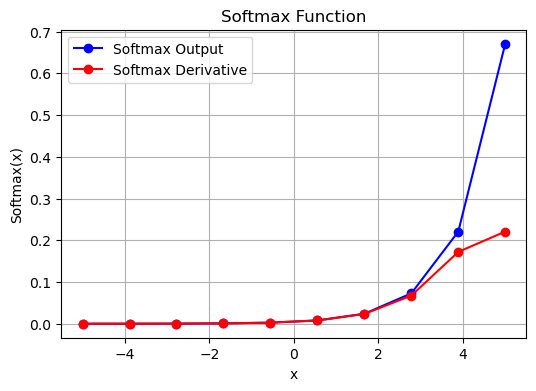

In [160]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

x = np.linspace(-5, 5, 10)
y = softmax(x)
dy = softmax_derivative(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'bo-', label="Softmax Output")
plt.plot(x, dy, 'ro-', label="Softmax Derivative")
plt.xlabel("x")
plt.ylabel("Softmax(x)")
plt.title("Softmax Function")
plt.legend()
plt.grid()
plt.show()

# Artificial Neural Networks

## Perceptron Model
$$y = f(WX + b)$$
where
- **Input Vector**: $X = x_1, x_2, \ldots, x_n$
- **Weight Vector**: $W = w_1, w_2, \ldots, w_n$
- **Bias**: $b$
- **Activation Function**: f(z)

## Perceptron Learning Algorithm
1. Initialize weights and bias randomly.
2. For each training example:
   - Compute output $y$
   - Update weights if prediction is incorrect: $$w_j = w_j + \eta \cdot (y_{true} - y_{pred}) \cdot x_j$$
     where $\eta$ is the learning rate.
3. Repeat until convergence.

## Two Input - Two Output Architecture

We consider a case of two inputs and two outputs as follows:

In [225]:
inputs  = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[0, 0], 
                    [0, 1], 
                    [0, 1], 
                    [1, 0]])

Output after training:
[[0.50000137 0.62245933]
 [0.50409154 0.62245933]
 [0.50409154 0.62245933]
 [0.72722798 0.62245933]]


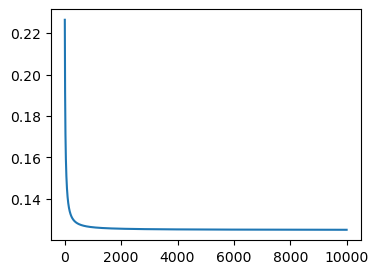

In [255]:
weights_input_output  = 2 * np.random.random((2, 2)) - 1
bias_output = np.random.randn(1, 2)

cost_graph = []

for epoch in range(10000):

    output_layer = sigmoid(np.dot(inputs, weights_input_output) + bias_output)
    
    output_error = outputs - output_layer
    loss = np.mean(np.square(output_error))
    cost_graph.append(loss)

    output_delta = output_error * sigmoid_derivative(output_layer)

    weights_input_output += inputs.T.dot(output_delta)
    bias_output += np.sum(output_delta, axis=0, keepdims=True)

print("Output after training:")
print(sigmoid(output_layer))

plt.figure(figsize=(4, 3))
plt.plot(cost_graph)

## Two Input - Two Hidden - Two Output Architecture


Output after training:
[[0.50138117 0.62258627]
 [0.50194917 0.7286155 ]
 [0.50138719 0.62235424]
 [0.72844056 0.50333546]]


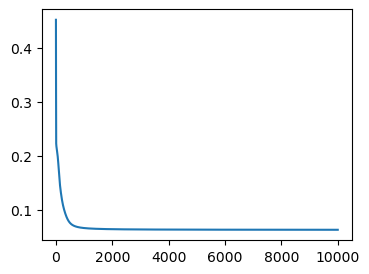

In [261]:
weights_input_hidden  = 2 * np.random.random((2, 2)) - 1
weights_hidden_output = 2 * np.random.random((2, 2)) - 1

bias_hidden = np.random.randn(1, 2)
bias_output = np.random.randn(1, 2)

cost_graph = []

for epoch in range(10000):
    input_layer = inputs
    hidden_layer = sigmoid(np.dot(input_layer, weights_input_hidden) + bias_hidden)
    output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output) + bias_output)

    output_error = outputs - output_layer
    output_delta = output_error * sigmoid_derivative(output_layer)
    cost_graph.append(np.mean(np.square(output_error)))
    
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)

    weights_hidden_output += hidden_layer.T.dot(output_delta)
    weights_input_hidden += input_layer.T.dot(hidden_delta)

    bias_output += np.sum(output_delta, axis=0, keepdims=True)
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True)

print("Output after training:")
print(sigmoid(output_layer))

plt.figure(figsize=(4, 3))
plt.plot(cost_graph)


## Two Input - Two Hidden 1 - Two Hidden 2 - Two Output Architecture


Output after training:
[[0.50173007 0.50263777]
 [0.50129502 0.72931051]
 [0.50129178 0.72930421]
 [0.72864512 0.50152487]]


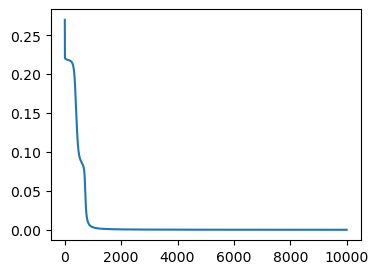

In [269]:
weights_input_hidden1   = 2 * np.random.random((2, 2)) - 1
weights_hidden1_hidden2 = 2 * np.random.random((2, 2)) - 1
weights_hidden2_output  = 2 * np.random.random((2, 2)) - 1

bias_hidden1 = np.random.randn(1, 2)
bias_hidden2 = np.random.randn(1, 2)
bias_output = np.random.randn(1, 2)

cost_graph = []

weights_history = []

for epoch in range(10000):
    input_layer = inputs
    hidden_layer1 = sigmoid(np.dot(input_layer, weights_input_hidden1) + bias_hidden1)
    hidden_layer2 = sigmoid(np.dot(hidden_layer1, weights_hidden1_hidden2) + bias_hidden2)
    output_layer  = sigmoid(np.dot(hidden_layer2, weights_hidden2_output) + bias_output)

    output_error = outputs - output_layer

    cost_graph.append(np.mean(np.square(output_error)))

    output_delta  = output_error * sigmoid_derivative(output_layer)

    hidden2_error = output_delta.dot(weights_hidden2_output.T)
    hidden2_delta = hidden2_error * sigmoid_derivative(hidden_layer2)

    hidden1_error = hidden2_delta.dot(weights_hidden1_hidden2.T)
    hidden1_delta = hidden1_error * sigmoid_derivative(hidden_layer1)

    weights_hidden2_output  += hidden_layer2.T.dot(output_delta)
    weights_hidden1_hidden2 += hidden_layer1.T.dot(hidden2_delta)
    weights_input_hidden1   += input_layer.T.dot(hidden1_delta)

    bias_hidden1 += np.sum(hidden1_delta, axis=0, keepdims=True)
    bias_hidden2 += np.sum(hidden2_delta, axis=0, keepdims=True)
    bias_output  += np.sum(output_delta, axis=0, keepdims=True)

    if epoch % 1000 == 0:
        weights_history.append((epoch, 
                                weights_input_hidden1.copy(), 
                                weights_hidden1_hidden2.copy(), 
                                weights_hidden2_output.copy()))

print("Output after training:")
print(sigmoid(relu(output_layer)))

plt.figure(figsize=(4, 3))
plt.plot(cost_graph)

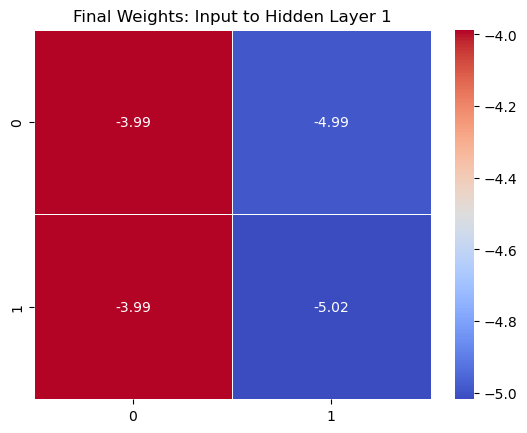

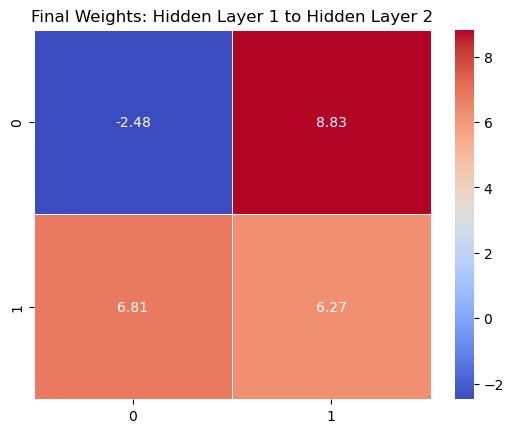

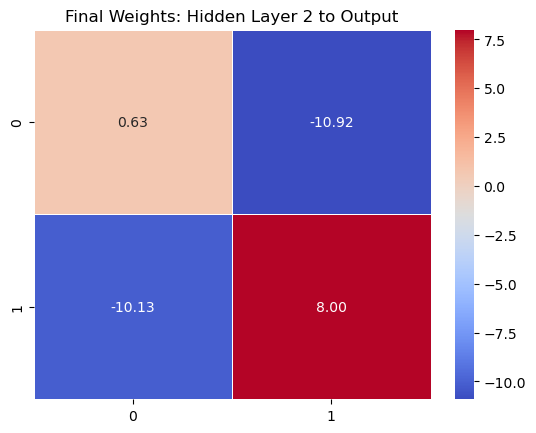

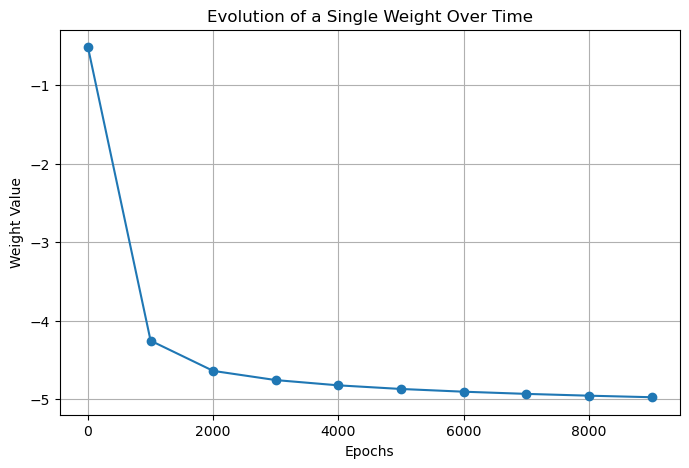

In [273]:
import seaborn as sns

def plot_heatmap(matrix, title):
    sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

# Show final weights
plot_heatmap(weights_input_hidden1, "Final Weights: Input to Hidden Layer 1")
plot_heatmap(weights_hidden1_hidden2, "Final Weights: Hidden Layer 1 to Hidden Layer 2")
plot_heatmap(weights_hidden2_output, "Final Weights: Hidden Layer 2 to Output")

plt.figure(figsize=(8, 5))
epochs_logged = [w[0] for w in weights_history]
weight_evolution = [w[1][0, 0] for w in weights_history]  # Tracking first weight as an example
plt.plot(epochs_logged, weight_evolution, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Weight Value")
plt.title("Evolution of a Single Weight Over Time")
plt.grid()
plt.show()

In [274]:
weights_input_hidden1

array([[-3.98674232, -4.9936305 ],
       [-3.99021652, -5.01802736]])